In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries

In [ ]:
df_aanzfta = df[df['job_country'].isin(aanzfta_countries)].copy()
df_aanzfta['job_posted_month'] = df_aanzfta['job_posted_date'].dt.strftime('%B')
df_aanzfta_pivot = df_aanzfta.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_aanzfta_pivot.reset_index(inplace=True)
df_aanzfta_pivot['month_num'] = pd.to_datetime(df_aanzfta_pivot['job_posted_month'], format='%B').dt.month
df_aanzfta_pivot.sort_values('month_num', inplace=True)
df_aanzfta_pivot.set_index('job_posted_month', inplace=True)
df_aanzfta_pivot.drop(columns='month_num', inplace=True)

df_aanzfta_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,708,136,2168,2226,1155,145,376,523,264,548
February,476,91,1185,1243,609,120,217,262,156,333
March,537,146,1383,1338,682,160,241,310,128,539
April,713,216,1281,1275,697,149,241,318,154,653
May,399,97,1226,1110,626,100,203,239,141,292
June,484,94,1449,1326,734,128,209,312,162,266
July,550,137,1605,1370,720,150,256,322,152,451
August,654,195,1638,1648,862,174,275,364,189,598
September,543,108,1273,1220,625,139,182,280,111,375


In [9]:
#importing fictious data for luke barrouse 'https://lukeb.co/software_csv'
df_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month') 

df_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [11]:
df_merged = df_aanzfta_pivot.merge(df_software_pivot, on='job_posted_month')
df_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,708,136,2168,2226,1155,145,376,523,264,548,13619,9827,5108,4348
February,476,91,1185,1243,609,120,217,262,156,333,11456,9116,7298,4284
March,537,146,1383,1338,682,160,241,310,128,539,11102,8178,5814,4159
April,713,216,1281,1275,697,149,241,318,154,653,14037,9209,7232,4220
May,399,97,1226,1110,626,100,203,239,141,292,12126,8864,6718,4980
June,484,94,1449,1326,734,128,209,312,162,266,12003,8065,5902,4781
July,550,137,1605,1370,720,150,256,322,152,451,11914,8061,6839,4344
August,654,195,1638,1648,862,174,275,364,189,598,11571,8191,7413,4104
September,543,108,1273,1220,625,139,182,280,111,375,14016,8447,6139,4094


In [12]:
top_5 = (df_merged
         .sum()
         .sort_values(ascending=False)
         .head()
         .index
         .to_list()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

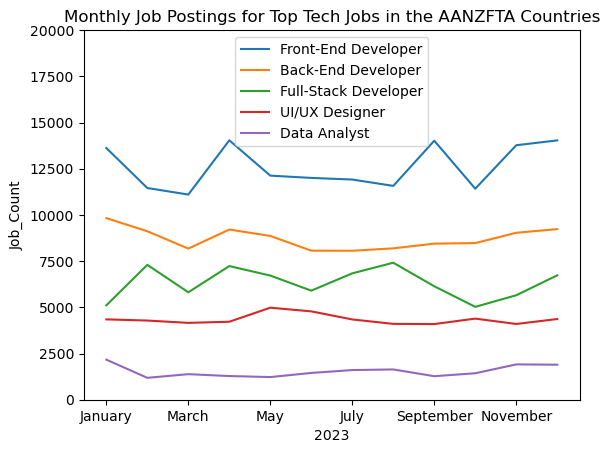

In [14]:
df_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the AANZFTA Countries')
plt.xlabel('2023')
plt.ylabel('Job_Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()